In [1]:
# Read the data from the file COVID19_line_list_data.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

covid_data = pd.read_csv('../COVID19_line_list_data.csv')

In [2]:
# Select the age and death columns
covid_age_death_data = covid_data[['age', 'death']]

In [3]:
# Drop rows that do not have age data
clean_covid_age_death_data = covid_age_death_data.dropna()

In [4]:
# Reformat death data to be just 0's and 1's
def strip_date(data):
    if data != '0' and data != '1':
        return 1.0
    else: return float(data)

reformatted_clean_covid_age_death_data = clean_covid_age_death_data[['age','death']]
reformatted_clean_covid_age_death_data['death'] = \
reformatted_clean_covid_age_death_data['death'].apply(strip_date)

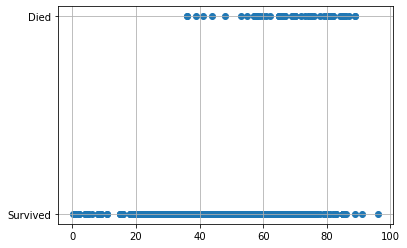

In [5]:
# Plot a scatterplot of age vs. death
plt.scatter(reformatted_clean_covid_age_death_data['age'], reformatted_clean_covid_age_death_data['death'])
plt.grid(b=True)
plt.yticks([0,1],['Survived','Died'])
plt.show()

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


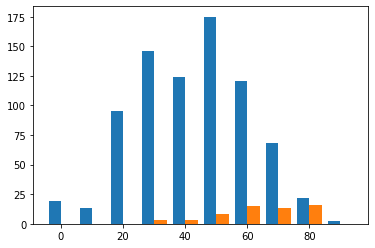

In [6]:
# Plot histogram of the age of survivors and non-survivors
age_data = np.array([reformatted_clean_covid_age_death_data[reformatted_clean_covid_age_death_data['death'] == 0.0]['age'], reformatted_clean_covid_age_death_data[reformatted_clean_covid_age_death_data['death'] == 1.0]['age']])
bins_data = np.linspace(0,100,11)
print(bins_data)
hist_data = plt.hist(age_data, bins=bins_data, histtype='bar', align='left')
plt.show()

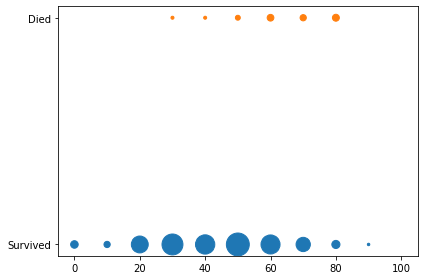

In [7]:
# Repeat scatterplot with size of dots being cases in 10-year age span
survived = np.concatenate((hist_data[0][0], np.array([0])))*3
died = np.concatenate((hist_data[0][1], np.array([0])))*3
plt.scatter(hist_data[1], np.array([0]*11), s=survived)
plt.scatter(hist_data[1], np.array([0.5]*11), s=died)
plt.yticks([0,0.5],['Survived','Died'])
plt.tight_layout()
plt.show()